# Prediktiv Analyse med lineær regresjon
Følgende er en demosntrasjon av en fullstedig pipeline for en prediktiv analyse av Trondheim Forecast. Her tas lineær regresjon i bruk. 

##### Lineær regresjon:
Lineær regresjon er et verktøy som forsøker å modellere sammenheng mellom en avhengig variabel som for eksempel temperatur og en uavhengig varaibel ved å tilpasse en rett linje.

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

- y er for oss den avhengige variabelen Temperatur.
- x er de uavhengige varaiblene som for eksempel Tid
- beta_0 er konstantleddet
- beta_n er regresjonskoeffisienter som minimerer forskjellen mellom predikerte verdier og de faktiske verdiene. 

#### Import av moduler og klasser:

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

import pandas as pd
from data_reader import DataLeser
from data_prediction import DataPrediksjon
%matplotlib inline

#### Last inn renset data

In [2]:
df = DataLeser(data_dir="../data").les_csv("trondheim_forecast_cleaned.csv")

#### Initialiser Prediksjonsklasse:

In [3]:
pred = DataPrediksjon(df, målvariabel = "Temperatur")

Ved initialisering deles datasettet opp i Trening- og Test-setter. Dette er for å evaluere modellens ytelse på data den ikke har sett:
- Trening: brukes til å lære mønstre og sammenhenger.
- Test: holdes utenfor treningsettet og sammenlignes med modellens evne til å vende seg til nye situasjoner.

#### Tren modell:
- Trener den lineære modellen på treningsdata. Bruker Pipeline med StandardScaler og OneHotEncoder.
    - StandardScaler: Standardiserer de numeriske inputvariablene slik at de får gjennomsnitt 0 og standardavvik 1. Dette forbedrer modellens stabilitet og læringsevne.
    - ColumnTransfer: Sørger for at riktige transformasjoner brukes på riktige kolonner (numerisk vs. kategorisk).
    - OneHotEncoder: Konverterer eventuelle kategoriske variabler (f.eks. "vindretning" hvis det fantes) til binære kolonner. Dette gjør det mulig for den lineære modellen å bruke slike tekstkategorier som input.

In [4]:
modell = pred.tren_lineær_modell()

#### Tidsserieplott:
Viser faktisk og predikert temperatur over tid i to linjediagrammer. Gir oversikt over tidsavhengig avvik.

/Users/edigalane/kode/MiljoDataProsjekt/src/data_prediction.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vis["Dag"] = pd.to_datetime(df_vis["Tid"], errors="coerce").dt.date


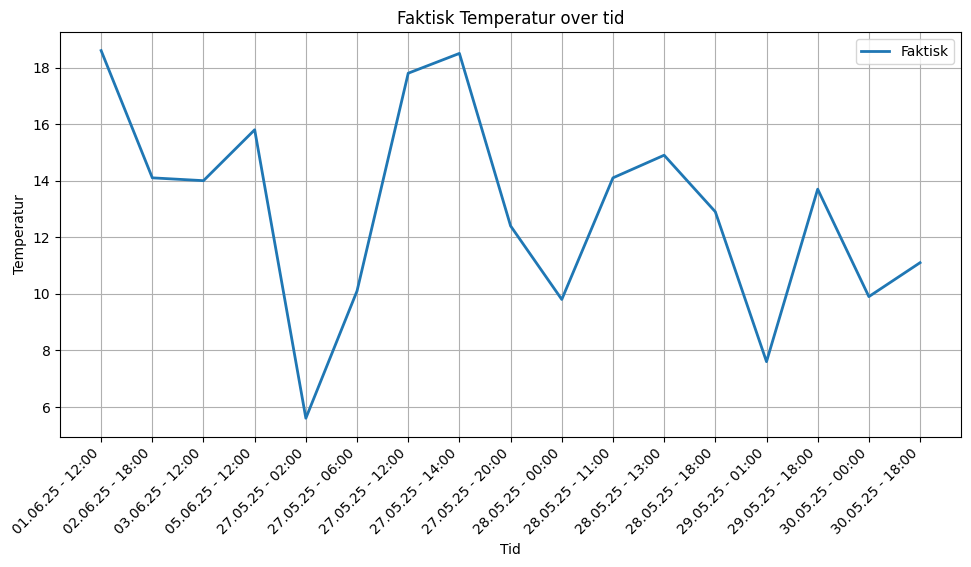

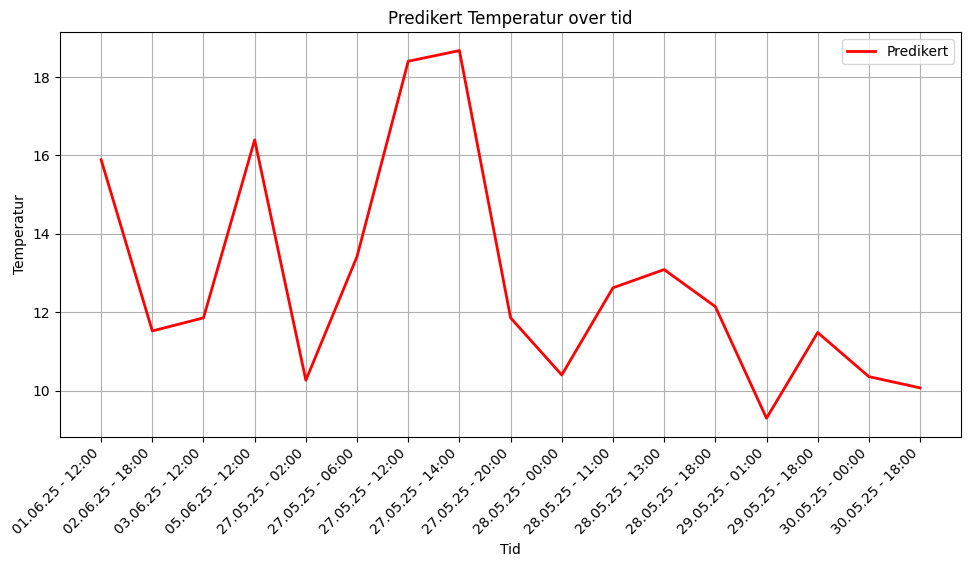

In [5]:
pred.visualiser_tidserie()


Visualiseringen viser utviklingen i temperatur over tid. 
Begge grafer bruker samme tidsskala, så det er lett å sammenligne trendene til tross for at tid aksen er urregelmessig. 
Modellen fanger opp hovedtrekkene, men man kan se enkelte avvik, dette er forventet ved bruk av en enkel lineær modell på værdata.

#### Scatterplot:
Sammenligner faktisk og predikert temperatur. 

/Users/edigalane/kode/MiljoDataProsjekt/src/data_prediction.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vis["Dag"] = pd.to_datetime(df_vis["Tid"], errors="coerce").dt.date


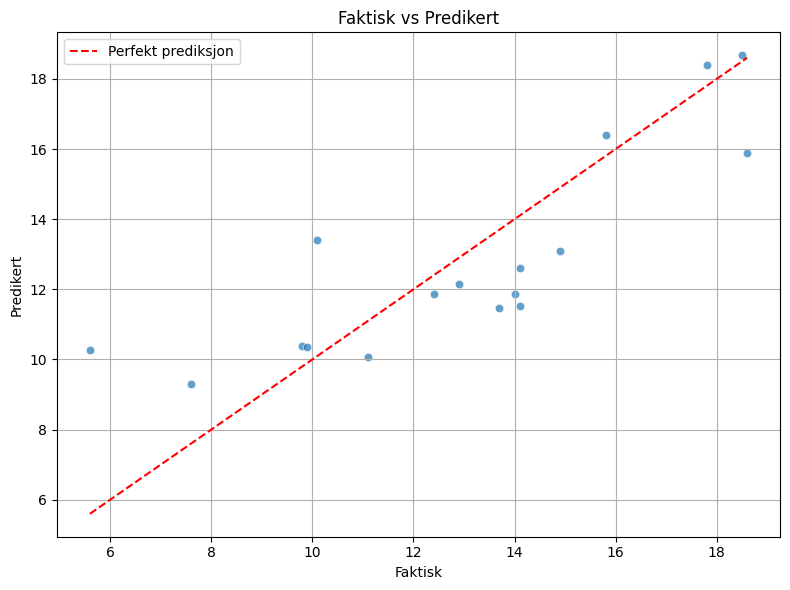

In [6]:
pred.visualiser_scatter()

Figuren viser at modellen har en klar positiv trend, noe som er forventet i en lineær regresjon. 
Spredningen av blåe punkter er spredningen av faktisk verdi mot modellens prediksjon. Spredningen indikerer at modellen ikke treffer nøyaktig. 
Dette viser felles trenden, men samtidig skjevheter i modellen. 

#### Boxplot av prediksjonsfeil per uke:
Vi tar i bruk et boxplot for å vise spredningen i feil per uke. 

/Users/edigalane/kode/MiljoDataProsjekt/src/data_prediction.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vis["Dag"] = pd.to_datetime(df_vis["Tid"], errors="coerce").dt.date


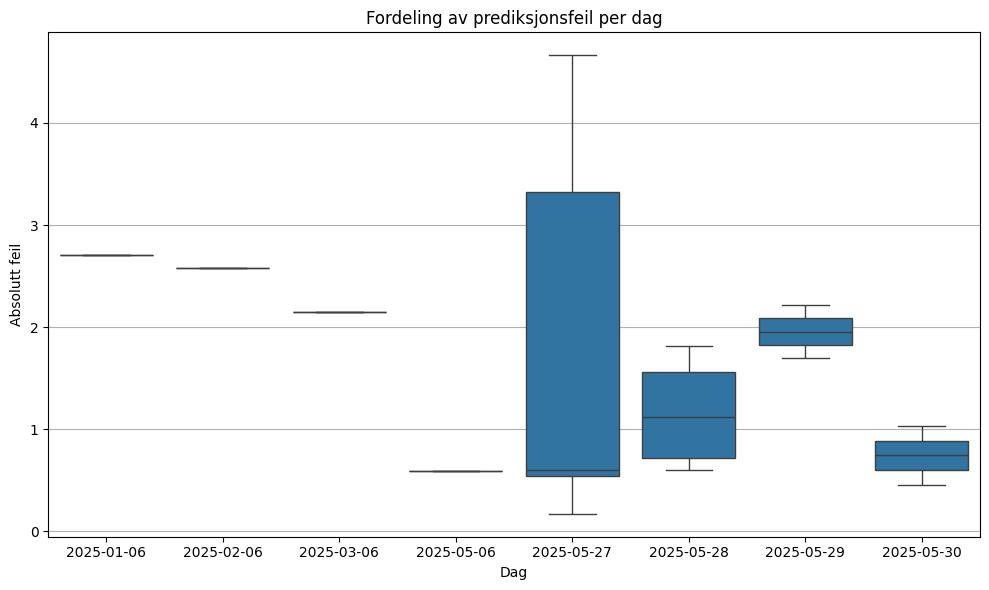

In [7]:
pred.visualiser_feil_pr_dag()

Denne kan være litt vanskeligere å forstå:
- Y-aksen viser hvor mange grader modellen bommer med.
- X-aksen viser feilene basert på dag. 

Altså hver boks presenterer spredningen i prediksjonsfeil for en dag. Større bokser indikerer stor variasjon i feil, mens smalere og jevnere bokser impliserer mer konsistende prediksjoner. 

#### Modellevaluering:
Evaluerer modellen på testsettet. R^2 måler forklaringsgrad mens RMSE viser gjennomsnittlig predikjsonsavvik.

In [8]:
resultater = pred.evaluer_modell()
print("Evalueringsresultater:")
for navn, res in resultater.items():
    print(f"{navn}: R2= {res['R^2']:.3f}, RMSE= {res['RMSE']:.3f}")

Evalueringsresultater:
Lineær: R2= 0.686, RMSE= 1.998


### Konklusjoner:

**R2** score antyder til det modellen klarer å forklare. For eksempel en 0.686 R2 betyr at modellen forklarer ca 68,6% av variasjonen i temperaturdataene i testsettet. Dette er for eksempel en moderat til sterk forklaringsevne, men det er ideelt med en R2 så nær 1 som mulig.

**RMSE** er Root Mean Squared Error og viser gjennomsnittlig avvik mellom faktiske og predikerte temperaturverdier. Om denne er for eksempel 1.998 så impliserer det at modellen i snitt tar feil med +- 2 grader.

Modellen greier for det meste å fange hovedtrender, men sliter med presisjon. Dette kan være grunnet uteliggerene i datasettet. For å motvirke dette kunne det ha vært vurdert å ta i bruk andre regresjonsmodeller som RANSAC eller fjerne uteliggere for en mer presis approksimasjon. 

Når det kommer til **visualiseringer** så bestemte vi oss for å inkludere Tidsserier for faktisk mot predikert, scatter av faktisk mot prediket og boxplot av prediksjonsfeil per dag. Disse bidro til å formidle modellens styrker og svakheter. Tidsserien hjelper med å se hvordan modellen approksimerer de faktiske verdiene. Noen klare svakheter var utydelige x-akser, spesielt i visualiseringer over lange tidsintervaller. Dette kunne ha vært forbedret ved å formattere og sortere tidsverdier bedre i fremtidige analyser.